<a href="https://colab.research.google.com/github/Tommmster/diplodatos-2022-g20/blob/main/entregable_3_intro_ml/IntroML_Lab2_VersionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al Aprendizaje Automático**

**Edición 2022**

---
## **Trabajo práctico entregable - Laboratorio 2**
---

## **Grupo 20**

**Integrantes:** Gastón Briozzo, Fanny Ruales Tomas Niño Kehoe

**Profesor de Práctico:** Alejandro García

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#dataset = pd.read_csv("./data/loan_data.csv", comment="#")
dataset = pd.read_csv("loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

In [ ]:
dataset[:5]

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [ ]:
dataset['TARGET'].value_counts()

0    1545
1     309
Name: TARGET, dtype: int64

### 1.1. ¿De qué se trata el conjunto de datos?

El archivo loan_data.csv contiene un conjunto de datos de préstamos de Kaggle Home Equity.

El departamento de crédito al consumo de un banco quiere automatizar el proceso de toma de decisiones para la aprobación de líneas de crédito con garantía hipotecaria. Para ello, van a seguir las recomendaciones de la Ley de Igualdad de Oportunidades de Crédito para crear un modelo de puntuación de crédito derivado empíricamente y estadísticamente sólido. El modelo se basará en datos recogidos de solicitantes recientes a los que se les ha concedido un crédito a través del proceso actual de suscripción de préstamos. Éste se construirá a partir de herramientas de modelado predictivo, pero debe ser lo suficientemente interpretable como para proporcionar una razón para cualquier acción adversa (rechazos).

El conjunto de datos de Home Equity (HMEQ) contiene información de referencia y de rendimiento del préstamo para 5.960 préstamos recientes sobre el capital de la vivienda. El objetivo (TARGET) es una variable binaria que indica si un solicitante acabó incumpliendo o siendo gravemente moroso. Este resultado adverso se produjo en 1189 casos (20%). Para cada solicitante se registraron 12 variables de entrada. 

### 1.2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

El objetivo a predecir es una variable binaria que se encuentra en la columna 'TARGET'. Esta indica si un solicitante acabó incumpliendo o siendo gravemente moroso:

Etiqueta = 1 : el cliente ha dejado de pagar el préstamo. 

Etiqueta = 0 : el préstamo ha sido devuelto.

### 1.3. ¿Qué información (atributos) hay disponible para hacer la predicción?

El conjunto de datos cuenta con los siguientes atributos:

1.  LOAN:    Importe de la solicitud de préstamo.
2.  MORTDUE: Importe a pagar de la hipoteca existente.
3.  VALUE:   Valor del inmueble actual.
4.  YOJ:     Años en el trabajo actual.
5.  DEROG:   Número de informes derogatorios importantes.
6.  DELINQ:  Número de líneas de crédito morosas.
7.  CLAGE:   Antigüedad de la línea comercial más antigua en meses.
8.  NINQ:    Número de líneas de crédito recientes.
9.  CLNO:    Número de líneas de crédito.
10. DEBTINC: Relación deuda-ingresos.

### 1.4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

Analicemos cada uno de los atributos:

1.  LOAN:    El importe del préstamo solicitado puede ser relativo a la capacidad de cada persona. Si bien puede existir una relación entre este importe y la viabilidad del préstamo, no creemos que sea demasiado marcada.
2.  MORTDUE: La deuda hipotecaria parece ser mas relevante a la hora de determinar la capacidad de un solicitante de cumplir con el préstamo. Si una persona ya debe dinero, no debería asumir mas deudas.
3.  VALUE:   El valor de la vivienda puede dar una idea de cuanto respaldo económico tiene el solicitante. Sin embargo, una persona con buenos ingresos no tiene por que vivir en una casa lujosa, o al revés. Esperamos encontrar una correlación aquí, aunque no en exceso.
4.  YOJ:     Los años en el empleo actual no parecen tener correlación con la viabilidad del préstamo. Una persona puede llevar muchos años en el mismo empleo porque esta cómodamente asentada o porque le es imposible avanzar. Al mismo tiempo, un empleo nuevo puede indicar tanto que la persona no es capaz de retener sus oportunidades de trabajo como que avanza en su carrera.
5.  DEROG:   El número de informes derogatorios parece ser importante a la hora de determinar la fiabilidad de una persona.
6.  DELINQ:  El número de líneas de crédito morosas puede indicar que tan propensa es una persona a incumplir sus pagos, por lo que esperamos una fuerte correlación.
7.  CLAGE:   La antigüedad de la línea comercial no tiene por que estar correlacionada con la fiabilidad del solicitante.
8.  NINQ:    No esperamos correlación entre el número de líneas de crédito recientes y la viabilidad del préstamo.
9.  CLNO:    No esperamos correlación entre el número de líneas de crédito y la viabilidad del préstamo.
10. DEBTINC: Esperamos que la relación deuda-ingresos este fuertemente correlacionada con la viabilidad del préstamo, dado que una persona que gasta mas de lo que gana difícilmente pueda afrontar la deuda, mientras que en el caso opuesto es claro que el solicitante tiene la capacidad de cumplir.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

#### Entrenamiento del Modelo

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model=Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(random_state=0))])
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model', SGDClassifier(random_state=0))])

Evaluación sobre el Conjunto de Entrenamiento

Training score:  0.8732299393122049
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1232
           1       0.71      0.42      0.53       251

    accuracy                           0.87      1483
   macro avg       0.80      0.69      0.73      1483
weighted avg       0.86      0.87      0.86      1483

Accuracy:   0.8732299393122049
Precision:  [0.89071856 0.71428571]
Recall:     [0.96590909 0.41832669]
F1:         [0.92679128 0.52763819]


[Text(33.0, 0.5, 'Etiqueta Predicha'), Text(0.5, 24.0, 'Etiqueta Verdadera')]

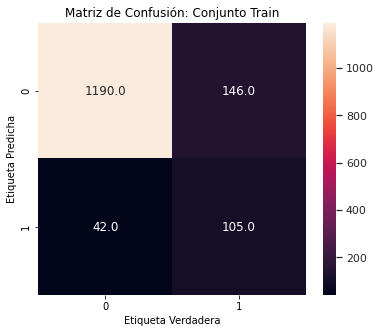

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_train_p = model.predict(X_train)

score = model.score(X_train, y_train)
print("Training score: ", score) 

print(classification_report(y_train, y_train_p)) 

acs =  accuracy_score(y_train,y_train_p) 
rs  =    recall_score(y_train,y_train_p, average=None) 
ps  = precision_score(y_train,y_train_p, average=None)
f1  =        f1_score(y_train,y_train_p, average=None)
print("Accuracy:  ",acs)
print("Precision: ",ps)
print("Recall:    ",rs)
print("F1:        ",f1)

cm = confusion_matrix(y_train, y_train_p)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión: Conjunto Train" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f') 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels) 
ax.set(ylabel="Etiqueta Predicha", xlabel="Etiqueta Verdadera")

Conclusion:

Evaluación sobre el Conjunto de Test

Test score:  0.8679245283018868
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       313
           1       0.65      0.34      0.45        58

    accuracy                           0.87       371
   macro avg       0.77      0.65      0.69       371
weighted avg       0.85      0.87      0.85       371

Accuracy:   0.8679245283018868
Precision:  [0.88823529 0.64516129]
Recall:     [0.96485623 0.34482759]
F1:         [0.92496172 0.4494382 ]


[Text(30.5, 0.5, 'Etiqueta Predicha'), Text(0.5, 21.5, 'Etiqueta Verdadera')]

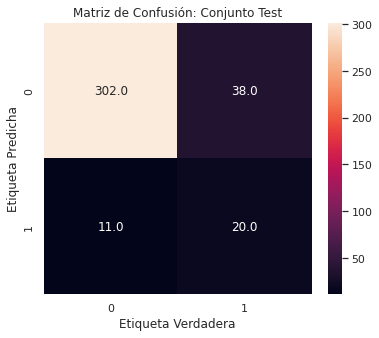

In [ ]:
y_test_p = model.predict(X_test)

score = model.score(X_test, y_test)
print("Test score: ", score) 

print(classification_report(y_test, y_test_p))

acs =  accuracy_score(y_test,y_test_p) 
rs  =    recall_score(y_test,y_test_p, average=None) 
ps  = precision_score(y_test,y_test_p, average=None)
f1  =        f1_score(y_test,y_test_p, average=None)
print("Accuracy:  ",acs)
print("Precision: ",ps)
print("Recall:    ",rs)
print("F1:        ",f1)

cm = confusion_matrix(y_test, y_test_p)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión: Conjunto Test" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f') 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels) 
ax.set(ylabel="Etiqueta Predicha", xlabel="Etiqueta Verdadera")

Coclusion:

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Entrenamos con los distintos hiperparámetros:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__loss': ['hinge', 'log', 'squared_error', 'preceptron'],
    'model__learning_rate':['constant', 'optimal','adaptive'],
    'model__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
     }

cv = GridSearchCV(model, param_grid, scoring ='accuracy', refit=True, cv=5)
cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/p

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('model',
                                        SGDClassifier(random_state=0))]),
             param_grid={'model__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'model__learning_rate': ['constant', 'optimal',
                                                  'adaptive'],
                         'model__loss': ['hinge', 'log', 'squared_error',
                                         'preceptron']},
             scoring='accuracy')

Reportamos la accuracy promedio y varianza para todas las configuraciones:

In [ ]:
results = cv.cv_results_

df_SDGC = pd.DataFrame(results)
df_SDGC.sort_values('rank_test_score')[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__learning_rate,param_model__loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,0.023119,0.011523,0.010054,0.011643,0.001,optimal,log,"{'model__alpha': 0.001, 'model__learning_rate'...",0.861953,0.861953,0.861953,0.891892,0.868243,0.869199,0.011605,1
41,0.014933,0.001530,0.005321,0.002786,0.01,optimal,log,"{'model__alpha': 0.01, 'model__learning_rate':...",0.865320,0.868687,0.865320,0.885135,0.854730,0.867838,0.009843,2
40,0.012372,0.001291,0.004430,0.000505,0.01,optimal,hinge,"{'model__alpha': 0.01, 'model__learning_rate':...",0.872054,0.861953,0.865320,0.871622,0.861486,0.866487,0.004567,3
28,0.026706,0.010583,0.007347,0.006095,0.001,optimal,hinge,"{'model__alpha': 0.001, 'model__learning_rate'...",0.858586,0.861953,0.868687,0.878378,0.861486,0.865818,0.007099,4
54,0.017644,0.004448,0.008774,0.003967,0.1,optimal,squared_error,"{'model__alpha': 0.1, 'model__learning_rate': ...",0.861953,0.855219,0.855219,0.864865,0.854730,0.858397,0.004198,5
42,0.028201,0.016731,0.011046,0.010270,0.01,optimal,squared_error,"{'model__alpha': 0.01, 'model__learning_rate':...",0.851852,0.851852,0.851852,0.864865,0.854730,0.855030,0.005042,6
17,0.032476,0.006415,0.005574,0.002366,0.0001,optimal,log,"{'model__alpha': 0.0001, 'model__learning_rate...",0.851852,0.858586,0.855219,0.861486,0.847973,0.855023,0.004781,7
53,0.012752,0.001067,0.003995,0.000256,0.1,optimal,log,"{'model__alpha': 0.1, 'model__learning_rate': ...",0.855219,0.858586,0.845118,0.854730,0.854730,0.853676,0.004516,8
30,0.016971,0.003836,0.004511,0.000580,0.001,optimal,squared_error,"{'model__alpha': 0.001, 'model__learning_rate'...",0.818182,0.865320,0.858586,0.864865,0.858108,0.853012,0.017676,9
52,0.009761,0.000295,0.004168,0.000939,0.1,optimal,hinge,"{'model__alpha': 0.1, 'model__learning_rate': ...",0.851852,0.855219,0.845118,0.851351,0.854730,0.851654,0.003606,10


Elegimos el mejor modelo:

In [ ]:
best_model = cv.best_estimator_
print('Mejor Estimador', cv.best_estimator_)

Mejor Estimador Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model',
                 SGDClassifier(alpha=0.001, loss='log', random_state=0))])


Evaluación sobre el Conjunto de Entrenamiento

Training score:  0.8732299393122049
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1232
           1       0.73      0.39      0.51       251

    accuracy                           0.87      1483
   macro avg       0.81      0.68      0.72      1483
weighted avg       0.86      0.87      0.86      1483

Accuracy:   0.8732299393122049
Precision:  [0.88724036 0.73333333]
Recall:     [0.97077922 0.39442231]
F1:         [0.92713178 0.51295337]


[Text(30.5, 0.5, 'Etiqueta Predicha'), Text(0.5, 21.5, 'Etiqueta Verdadera')]

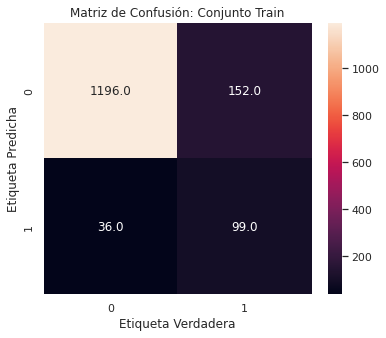

In [ ]:
y_train_p = best_model.predict(X_train)

score = best_model.score(X_train, y_train)
print("Training score: ", score) 

print(classification_report(y_train, y_train_p)) 

acs =  accuracy_score(y_train,y_train_p) 
rs  =    recall_score(y_train,y_train_p, average=None) 
ps  = precision_score(y_train,y_train_p, average=None)
f1  =        f1_score(y_train,y_train_p, average=None)
print("Accuracy:  ",acs)
print("Precision: ",ps)
print("Recall:    ",rs)
print("F1:        ",f1)

cm = confusion_matrix(y_train, y_train_p)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión: Conjunto Train" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f') 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels) 
ax.set(ylabel="Etiqueta Predicha", xlabel="Etiqueta Verdadera")

Evaluación sobre el Conjunto de Evaluación

Test score:  0.876010781671159
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       313
           1       0.70      0.36      0.48        58

    accuracy                           0.88       371
   macro avg       0.80      0.67      0.70       371
weighted avg       0.86      0.88      0.86       371

Accuracy:   0.876010781671159
Precision:  [0.8914956 0.7      ]
Recall:     [0.97124601 0.36206897]
F1:         [0.92966361 0.47727273]


[Text(30.5, 0.5, 'Etiqueta Predicha'), Text(0.5, 21.5, 'Etiqueta Verdadera')]

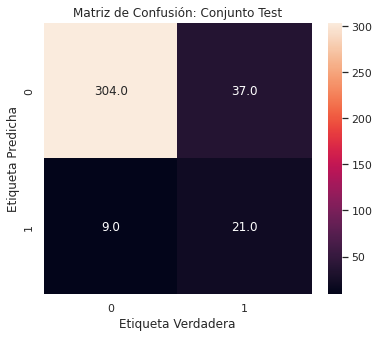

In [ ]:
y_test_p = best_model.predict(X_test)

score = best_model.score(X_test, y_test)
print("Test score: ", score) 

print(classification_report(y_test, y_test_p))

acs =  accuracy_score(y_test,y_test_p) 
rs  =    recall_score(y_test,y_test_p, average=None) 
ps  = precision_score(y_test,y_test_p, average=None)
f1  =        f1_score(y_test,y_test_p, average=None)
print("Accuracy:  ",acs)
print("Precision: ",ps)
print("Recall:    ",rs)
print("F1:        ",f1)

cm = confusion_matrix(y_test, y_test_p)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión: Conjunto Test" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f') 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels) 
ax.set(ylabel="Etiqueta Predicha", xlabel="Etiqueta Verdadera")

Conclusion: Se puede apreciar de los resultados obtenidos sobre los test de Evaluacion que nuestro modelo brinda metricas muy aceptables para la clase 0 - Paga, observando Precision, Recall, F1 se obtienen valores muy buenos. Como asi tambien el Accuracy es bastante aceptable.<br> Por otro lado, para la clase 1 - No Paga las metricas no son del todo aceptables.<br> En la Matriz de Confusion se puede ver claramente oscurecido la zona indicada.

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


#### Entrenamiento del Modelo

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)  #creamos el modelo con todos sus hiperparametros por default
arbol=clf.fit(X_train, y_train) #entrenamos el modelo creado



In [ ]:
accurecy=clf.score(X_test, y_test)
print('Accurecy:', accurecy)

Accurecy: 0.8814016172506739


Como se puede apreciar si bien la accurency es bastante buena con los parametros por default,sin embargo  ha sobreajustado dado que tomo todos los datos de entrenamiento para la clasificacion. <br>Por otro lado se debe tener en cuenta que las clases estan desbalanceadas. 

Evaluación sobre el Conjunto de Entrenamiento

In [ ]:
#usamos la clase predict para predecir y luego usamos las  metricas para ver cuan bien anduvo el clasificador.

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483

Accuracy:   1.0
Precision:  [1. 1.]
Recall:     [1. 1.]
F1:         [1. 1.]


[Text(30.5, 0.5, 'Etiqueta Predicha'), Text(0.5, 21.5, 'Etiqueta Verdadera')]

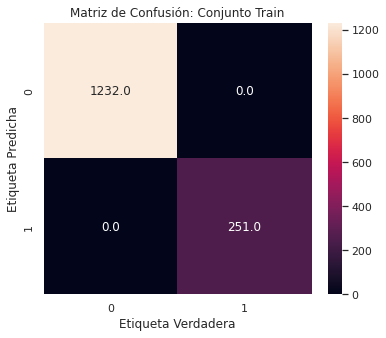

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_train, y_train_pred)) 

acs =  accuracy_score(y_train,y_train_pred) 
rs  =    recall_score(y_train,y_train_pred, average=None) 
ps  = precision_score(y_train,y_train_pred, average=None)
f1  =        f1_score(y_train,y_train_pred, average=None)
print("Accuracy:  ",acs)
print("Precision: ",ps)
print("Recall:    ",rs)
print("F1:        ",f1)

cm = confusion_matrix(y_train, y_train_pred)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión: Conjunto Train" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f') 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels) 
ax.set(ylabel="Etiqueta Predicha", xlabel="Etiqueta Verdadera")



Como se puede ver para la matriz de confusion el arbol a clasificado en foma perfecta, las celdas de Verdaderos Negativos, Verdaderos Positivos estan con todos sus valores mientras que las celdas de Falsos Negativos y Falsos Positivos tienen valor cero, a su vez las metricas de accuracy, precision, Recall y F1 dan 1, esto en realidad no es correcto dado que nuestro arbol a hecho un sobre ajuste.<br> Como mencionamos anteriormente al estar nuestro arbol sobre ajustado, para realizar predicciones a futuro tendra un error muy alto debido a este sobre ajuste. Razon por la cual debemos realizar un ajuste de Hiperparametros para encontrar el mejor modelo de prediccion. 

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Entrenamos con los distintos hiperparámetros:


In [ ]:
#Ajustaremos nuestro arbol considerando los parametros criterion, max_depth, min_samples_leaf
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth":range(2,3),
     'min_samples_leaf':range(30,40,50)}

gs = GridSearchCV(clf, param_grid, cv=5)# refit="AUC",  n_jobs=2, return_train_score=True,)
gs.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 3),
                         'min_samples_leaf': range(30, 40, 50)})

Reportamos la accuracy promedio y varianza para todas las configuraciones:

In [ ]:

results = gs.cv_results_

df_clf = pd.DataFrame(results)
df_clf.sort_values('rank_test_score')[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013772,0.005069,0.007764,0.007577,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.858586,0.861953,0.872054,0.885135,0.868243,0.869194,0.009254,1
1,0.011608,0.002507,0.005056,0.002814,entropy,2,30,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.858586,0.861953,0.872054,0.885135,0.868243,0.869194,0.009254,1
2,0.015243,0.006202,0.000000,0.000000,log_loss,2,30,"{'criterion': 'log_loss', 'max_depth': 2, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


Seleccionamos el mejor estimador:

In [ ]:
best_model_tree = gs.best_estimator_
print('Mejor Estimador', gs.best_estimator_)


Mejor Estimador DecisionTreeClassifier(max_depth=2, min_samples_leaf=30, random_state=0)


Evaluación sobre el Conjunto de Entrenamiento

Training score:  0.8712070128118679
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1232
           1       0.91      0.27      0.41       251

    accuracy                           0.87      1483
   macro avg       0.89      0.63      0.67      1483
weighted avg       0.88      0.87      0.84      1483

Accuracy:   0.8712070128118679
Precision:  [0.86941093 0.90540541]
Recall:     [0.99431818 0.26693227]
F1:         [0.92767891 0.41230769]


[Text(30.5, 0.5, 'Etiqueta Predicha'), Text(0.5, 21.5, 'Etiqueta Verdadera')]

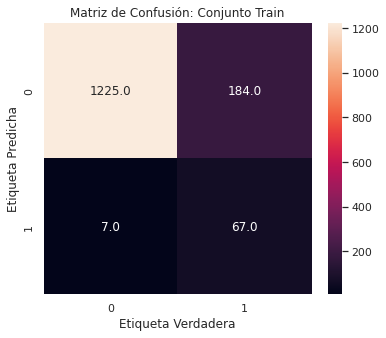

In [ ]:
y_train_p_tree = best_model_tree.predict(X_train)

score = best_model_tree.score(X_train, y_train)
print("Training score: ", score) 

print(classification_report(y_train, y_train_p_tree)) 

acs =  accuracy_score(y_train,y_train_p_tree) 
rs  =    recall_score(y_train,y_train_p_tree, average=None) 
ps  = precision_score(y_train,y_train_p_tree, average=None)
f1  =        f1_score(y_train,y_train_p_tree, average=None)
print("Accuracy:  ",acs)
print("Precision: ",ps)
print("Recall:    ",rs)
print("F1:        ",f1)

cm = confusion_matrix(y_train, y_train_p_tree)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión: Conjunto Train" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f') 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels) 
ax.set(ylabel="Etiqueta Predicha", xlabel="Etiqueta Verdadera")

Evaluamos el conjunto de Validacion

Test score:  0.8814016172506739
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.85      0.29      0.44        58

    accuracy                           0.88       371
   macro avg       0.87      0.64      0.68       371
weighted avg       0.88      0.88      0.86       371

Accuracy:   0.8814016172506739
Precision:  [0.88319088 0.85      ]
Recall:     [0.99041534 0.29310345]
F1:         [0.93373494 0.43589744]


[Text(30.5, 0.5, 'Etiqueta Predicha'), Text(0.5, 21.5, 'Etiqueta Verdadera')]

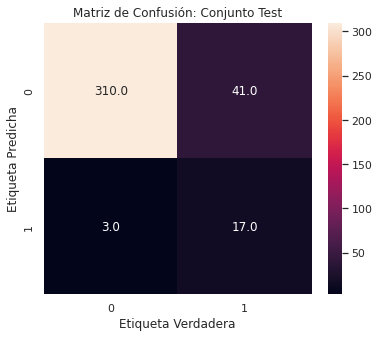

In [ ]:
y_test_p_tree = best_model_tree.predict(X_test)

score = best_model_tree.score(X_test, y_test)
print("Test score: ", score) 

print(classification_report(y_test, y_test_p_tree))

acs =  accuracy_score(y_test,y_test_p_tree) 
rs  =    recall_score(y_test,y_test_p_tree, average=None) 
ps  = precision_score(y_test,y_test_p_tree, average=None)
f1  =        f1_score(y_test,y_test_p_tree, average=None)
print("Accuracy:  ",acs)
print("Precision: ",ps)
print("Recall:    ",rs)
print("F1:        ",f1)

cm = confusion_matrix(y_test, y_test_p_tree)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión: Conjunto Test" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f') 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels) 
ax.set(ylabel="Etiqueta Predicha", xlabel="Etiqueta Verdadera")

Como conclusion obtenida de los resultados del test de evaluacion, podemos decir que nuestro clasificador es muy acertivo para la clase 0 - Paga, viendo las metricas de Precision, Recall y F1, su Accuracy tambien es muy buena, no obstante no podemos dejar de mencionar el bajo puntaje obtenido para las clase 1 - No Paga para las metricas mencionadas se muestran valores muy por debajo de lo esperado.<br> En la Matriz de Confusion se puede ver claramente oscurecido la zona indicada.